In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df = pd.read_csv("train1.csv")

In [62]:
df.shape

(42000, 785)

In [63]:
df.head(3)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  

[3 rows x 785 columns]

* here, the data is clean so we need not apply Feature Engineering here

In [64]:
X = df.iloc[:, 1:]

In [65]:
X.shape

(42000, 784)

In [66]:
X.head(3)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  

[3 rows x 784 columns]

In [67]:
y = df.iloc[:, 0]

In [68]:
y.shape

(42000,)

In [69]:
y.head(3)

0    1
1    0
2    1
Name: label, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10, test_size=0.2, stratify=y)

In [72]:
X_train.shape

(33600, 784)

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dc = DecisionTreeClassifier()

In [75]:
dc.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
from matplotlib.pylab import rcParams

In [77]:
rcParams['figure.figsize'] = 30,30

In [78]:
from sklearn.tree import plot_tree

[Text(0.3982427663679629, 0.9893617021276596, 'X[409] <= 0.5\ngini = 0.9\nsamples = 33600\nvalue = [3305, 3747, 3342, 3481, 3258, 3036, 3310, 3521, 3250\n3350]'),
 Text(0.15624091226779332, 0.9680851063829787, 'X[434] <= 0.5\ngini = 0.816\nsamples = 11092\nvalue = [2757, 3292, 915, 690, 174, 1278, 611, 372, 857, 146]'),
 Text(0.08219748151381115, 0.9468085106382979, 'X[455] <= 5.5\ngini = 0.555\nsamples = 4169\nvalue = [2712, 10, 208, 252, 39, 396, 231, 231, 39, 51]'),
 Text(0.046416581213456966, 0.925531914893617, 'X[323] <= 8.0\ngini = 0.826\nsamples = 1445\nvalue = [360, 9, 140, 225, 11, 328, 154, 173, 29, 16]'),
 Text(0.01993539038336118, 0.9042553191489362, 'X[489] <= 1.5\ngini = 0.719\nsamples = 698\nvalue = [326, 3, 71, 6, 6, 100, 97, 77, 3, 9]'),
 Text(0.01047940902414621, 0.8829787234042553, 'X[183] <= 3.5\ngini = 0.515\nsamples = 475\nvalue = [320, 1, 20, 5, 2, 20, 27, 74, 1, 5]'),
 Text(0.00441238274700893, 0.8617021276595744, 'X[570] <= 16.0\ngini = 0.594\nsamples = 120\nva

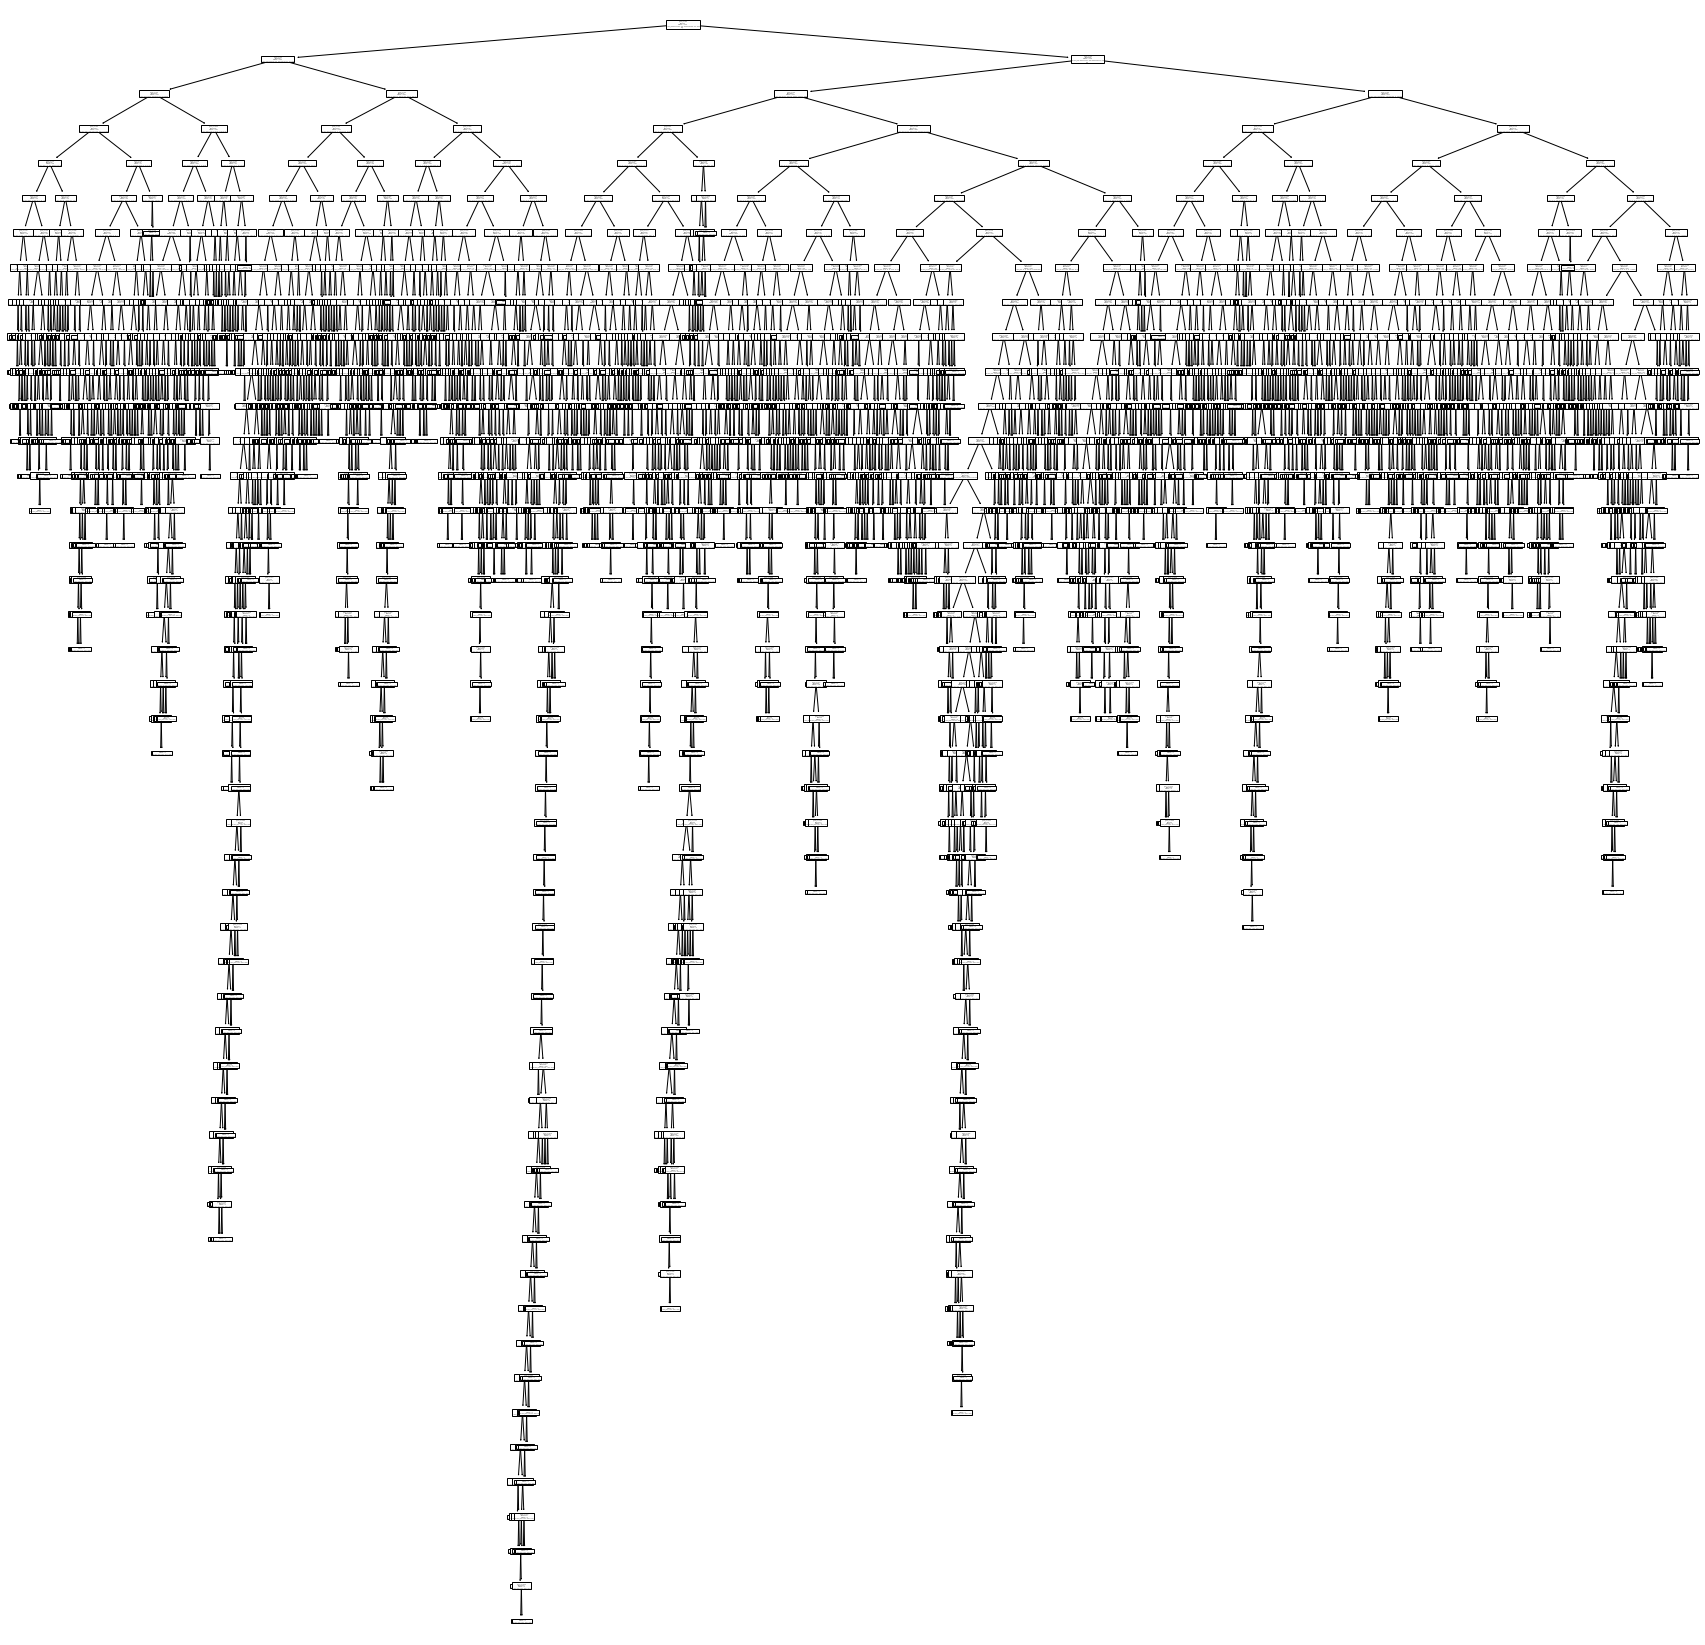

In [26]:
plot_tree(dc)

In [27]:
y_pred = dc.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test, y_pred)

0.8530952380952381

* Applying GridSearchCV - 

In [30]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_dist = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,20]
}

In [47]:
grid = GridSearchCV(dc, param_grid=param_dist, cv = 10 , n_jobs=-1)

In [48]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]})

In [49]:
y1_pred = grid.predict(X_test)

In [50]:
y1_pred

array([0, 0, 1, ..., 7, 1, 4], dtype=int64)

In [51]:
accuracy_score(y_test, y1_pred)

0.8601190476190477

In [52]:
grid.best_score_

0.8616369047619047

In [53]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20)

* thus we can see that Grid Search CV helps in improving our accuracy score

In [58]:
# plt.imshow(X_test[101].reshape(28,28))

In [80]:
# y_test[100]

In [81]:
# dc.predict(X_test[100].reshape(1,784))